In [141]:
import pandas as pd
import numpy as np

In [142]:
analysts = pd.read_csv('analystsinfo_t3.csv')
companyeps = pd.read_csv('company_eps_t2.csv')
companydetails = pd.read_csv('companydetails_t1.csv')
pending = pd.read_csv(r'pendingestimates_t5.csv')
scored = pd.read_csv(r'scoredestimates_t6.csv')
stocks = pd.read_csv(r'stockscovered_t4.csv')



In [143]:
print(analysts.shape)
print(companyeps.shape)
print(companydetails.shape)
print(pending.shape)
print(scored.shape)
print(stocks.shape)


(387, 11)
(260, 6)
(65, 6)
(1554, 7)
(3728, 8)
(2154, 8)


In [144]:

print(analysts.columns)
print(companyeps.columns)
print(companydetails.columns)
print(pending.columns)
print(scored.columns)
print(stocks.columns)

Index(['analyst_id', 'analyst_names', 'roles', 'membersince',
       'confidence_score', 'errorrate', 'accuracy', 'points',
       'points_per_estimate', 'stocks', 'pending_estimates'],
      dtype='object')
Index(['what_search', 'fquarter', 'reported_earnings', 'estimize_consensus',
       'estimize_mean', 'wall_street_consensus'],
      dtype='object')
Index(['what_search', 'name', 'sector', 'industry', 'followers', 'analysts'], dtype='object')
Index(['analyst_id', 'Ticker', 'Quarter', 'Reports', 'Published', 'EPS',
       'Revenue'],
      dtype='object')
Index(['analyst_id', 'Ticker', 'Quarter', 'Reported', 'Rank', 'EpsPoints',
       'RevenuePoints', 'TotalPoints'],
      dtype='object')
Index(['analyst_id', 'Ticker', 'Reports', 'Quarters', 'Points', 'PtsEst',
       'ErrorRate', 'Accuracy'],
      dtype='object')


In [145]:
analysts['analyst_id'].is_unique

False

In [146]:
join_1 = pd.merge(scored,pending, how = 'inner', on = 'Ticker')
join_2 = pd.merge(join_1,stocks, how = 'inner', on = 'Ticker')
join_3 = pd.merge(join_2,companydetails, how = 'inner', left_on = 'Ticker', right_on = 'what_search')
#join_4 = pd.merge(join_3, companyeps, how = 'inner', on='what_search')

In [147]:
join_1.columns

Index(['analyst_id_x', 'Ticker', 'Quarter_x', 'Reported', 'Rank', 'EpsPoints',
       'RevenuePoints', 'TotalPoints', 'analyst_id_y', 'Quarter_y', 'Reports',
       'Published', 'EPS', 'Revenue'],
      dtype='object')

In [148]:
print(join_3.shape)
#print(join_4.shape)

(43474, 27)


In [149]:
join_3.columns

Index(['analyst_id_x', 'Ticker', 'Quarter_x', 'Reported', 'Rank', 'EpsPoints',
       'RevenuePoints', 'TotalPoints', 'analyst_id_y', 'Quarter_y',
       'Reports_x', 'Published', 'EPS', 'Revenue', 'analyst_id', 'Reports_y',
       'Quarters', 'Points', 'PtsEst', 'ErrorRate', 'Accuracy', 'what_search',
       'name', 'sector', 'industry', 'followers', 'analysts'],
      dtype='object')

In [150]:
join_3.head()

,analyst_id_x,Ticker,Quarter_x,Reported,Rank,EpsPoints,RevenuePoints,TotalPoints,analyst_id_y,Quarter_y,...,Points,PtsEst,ErrorRate,Accuracy,what_search,name,sector,industry,followers,analysts
0,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,benjenholdings,Q3 2021,...,11,11.0,6.90%,74%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
1,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,benjenholdings,Q3 2021,...,-11,-11.0,37.90%,37%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
2,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,BillB1210,Q3 2021,...,11,11.0,6.90%,74%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
3,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,BillB1210,Q3 2021,...,-11,-11.0,37.90%,37%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
4,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,Analyst_5883186,Q3 2021,...,11,11.0,6.90%,74%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40


In [151]:
data = join_3.dropna()

In [152]:
data.head()

,analyst_id_x,Ticker,Quarter_x,Reported,Rank,EpsPoints,RevenuePoints,TotalPoints,analyst_id_y,Quarter_y,...,Points,PtsEst,ErrorRate,Accuracy,what_search,name,sector,industry,followers,analysts
0,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,benjenholdings,Q3 2021,...,11,11.0,6.90%,74%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
1,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,benjenholdings,Q3 2021,...,-11,-11.0,37.90%,37%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
2,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,BillB1210,Q3 2021,...,11,11.0,6.90%,74%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
3,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,BillB1210,Q3 2021,...,-11,-11.0,37.90%,37%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
4,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,Analyst_5883186,Q3 2021,...,11,11.0,6.90%,74%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40


In [153]:
data.head()

,analyst_id_x,Ticker,Quarter_x,Reported,Rank,EpsPoints,RevenuePoints,TotalPoints,analyst_id_y,Quarter_y,...,Points,PtsEst,ErrorRate,Accuracy,what_search,name,sector,industry,followers,analysts
0,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,benjenholdings,Q3 2021,...,11,11.0,6.90%,74%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
1,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,benjenholdings,Q3 2021,...,-11,-11.0,37.90%,37%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
2,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,BillB1210,Q3 2021,...,11,11.0,6.90%,74%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
3,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,BillB1210,Q3 2021,...,-11,-11.0,37.90%,37%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
4,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,Analyst_5883186,Q3 2021,...,11,11.0,6.90%,74%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40


In [154]:
data.columns

Index(['analyst_id_x', 'Ticker', 'Quarter_x', 'Reported', 'Rank', 'EpsPoints',
       'RevenuePoints', 'TotalPoints', 'analyst_id_y', 'Quarter_y',
       'Reports_x', 'Published', 'EPS', 'Revenue', 'analyst_id', 'Reports_y',
       'Quarters', 'Points', 'PtsEst', 'ErrorRate', 'Accuracy', 'what_search',
       'name', 'sector', 'industry', 'followers', 'analysts'],
      dtype='object')

In [155]:
data.describe()

,Quarters,Points,PtsEst,followers,analysts
count,22614.000000,22614.000000,22614.000000,22614.000000,22614.000000
mean,1.936544,3.336561,-2.663894,228.254311,185.239807
std,2.042206,29.746484,10.167725,95.558692,71.869640
min,1.000000,-90.000000,-35.500000,19.000000,23.000000
25%,1.000000,-8.000000,-8.000000,277.000000,221.000000
50%,1.000000,-8.000000,-8.000000,277.000000,221.000000
75%,1.000000,1.000000,0.100000,277.000000,221.000000
max,31.000000,220.000000,34.000000,277.000000,221.000000


In [156]:
#data = data[data.errorrate != '-']


In [157]:
data.shape

(22614, 27)

In [158]:
data.head()

,analyst_id_x,Ticker,Quarter_x,Reported,Rank,EpsPoints,RevenuePoints,TotalPoints,analyst_id_y,Quarter_y,...,Points,PtsEst,ErrorRate,Accuracy,what_search,name,sector,industry,followers,analysts
0,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,benjenholdings,Q3 2021,...,11,11.0,6.90%,74%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
1,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,benjenholdings,Q3 2021,...,-11,-11.0,37.90%,37%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
2,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,BillB1210,Q3 2021,...,11,11.0,6.90%,74%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
3,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,BillB1210,Q3 2021,...,-11,-11.0,37.90%,37%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40
4,yorel,CYD,Q3 2020,16-Nov-20,1/4,-2,13,11,Analyst_5883186,Q3 2021,...,11,11.0,6.90%,74%,CYD,China Yuchai International Limited,Industrials,Machinery,22,40


In [159]:
data.Quarter_y.nunique()

5

In [160]:
data['ErrorRate'] = (data['ErrorRate'].str.strip('%').astype(float))
data['Accuracy'] = (data['Accuracy'].str.strip('%').astype(float))


<ipython-input-160-47c6a5ee10bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ErrorRate'] = (data['ErrorRate'].str.strip('%').astype(float))
<ipython-input-160-47c6a5ee10bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Accuracy'] = (data['Accuracy'].str.strip('%').astype(float))


In [161]:
data.Revenue

0        622.26
1        622.26
2        625.26
3        625.26
4        620.26
          ...  
43469       273
43470       273
43471       273
43472       273
43473       273
Name: Revenue, Length: 22614, dtype: object

In [162]:
data.columns

Index(['analyst_id_x', 'Ticker', 'Quarter_x', 'Reported', 'Rank', 'EpsPoints',
       'RevenuePoints', 'TotalPoints', 'analyst_id_y', 'Quarter_y',
       'Reports_x', 'Published', 'EPS', 'Revenue', 'analyst_id', 'Reports_y',
       'Quarters', 'Points', 'PtsEst', 'ErrorRate', 'Accuracy', 'what_search',
       'name', 'sector', 'industry', 'followers', 'analysts'],
      dtype='object')

In [163]:
data['EpsPoints'] = data['EpsPoints'].astype(float)
data['RevenuePoints'] = data['RevenuePoints'].astype(float)
data['TotalPoints'] = data['TotalPoints'].astype(float)
data['EPS'] = data['EPS'].astype(float)
data['ErrorRate'] = data['ErrorRate'].astype(float)
data['Accuracy'] = data['Accuracy'].astype(float)


#data['confidence_score'] = data['confidence_score'].astype(float)
#data['errorrate'] = data['errorrate'].astype(float)
#data['Rank'] = data['Rank'].astype(float)
#data['Rank'] = float(data['Rank'])
#data['Revenue'] = data['Revenue'].astype(float)



<ipython-input-163-23209456c865>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EpsPoints'] = data['EpsPoints'].astype(float)
<ipython-input-163-23209456c865>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RevenuePoints'] = data['RevenuePoints'].astype(float)
<ipython-input-163-23209456c865>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22614 entries, 0 to 43473
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   analyst_id_x   22614 non-null  object 
 1   Ticker         22614 non-null  object 
 2   Quarter_x      22614 non-null  object 
 3   Reported       22614 non-null  object 
 4   Rank           22614 non-null  object 
 5   EpsPoints      22614 non-null  float64
 6   RevenuePoints  22614 non-null  float64
 7   TotalPoints    22614 non-null  float64
 8   analyst_id_y   22614 non-null  object 
 9   Quarter_y      22614 non-null  object 
 10  Reports_x      22614 non-null  object 
 11  Published      22614 non-null  object 
 12  EPS            22614 non-null  float64
 13  Revenue        22614 non-null  object 
 14  analyst_id     22614 non-null  object 
 15  Reports_y      22614 non-null  object 
 16  Quarters       22614 non-null  int64  
 17  Points         22614 non-null  int64  
 18  PtsEst

In [165]:
data = data[['EpsPoints','RevenuePoints','TotalPoints','EPS','Points','PtsEst','ErrorRate','Accuracy','followers','analysts','Ticker']]

In [166]:
data.columns

Index(['EpsPoints', 'RevenuePoints', 'TotalPoints', 'EPS', 'Points', 'PtsEst',
       'ErrorRate', 'Accuracy', 'followers', 'analysts', 'Ticker'],
      dtype='object')

In [167]:
#final_data = pd.get_dummies(data.Ticker, prefix='Ticker')
final_data = pd.get_dummies(data, columns = ['Ticker'])


In [168]:
data.shape

(22614, 11)

In [169]:
final_data.shape

(22614, 26)

In [170]:
#Normalizing the numerical features : 

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
#min_max_scaler = MinMaxScaler()
names = final_data.columns
final_data[['EpsPoints', 'RevenuePoints', 'TotalPoints', 'EPS', 'Points', 'PtsEst',
       'ErrorRate', 'Accuracy', 'followers', 'analysts']] = scaler.fit_transform(final_data[['EpsPoints', 'RevenuePoints', 'TotalPoints', 'EPS', 'Points', 'PtsEst',
       'ErrorRate', 'Accuracy', 'followers', 'analysts']])
final_data.head()

,EpsPoints,RevenuePoints,TotalPoints,EPS,Points,PtsEst,ErrorRate,Accuracy,followers,analysts,...,Ticker_EPAY,Ticker_EVBG,Ticker_FROG,Ticker_KGC,Ticker_KOP,Ticker_MMSI,Ticker_MTRX,Ticker_OXY,Ticker_PHM,Ticker_WTI
0,0.46,0.76,0.595506,0.559524,0.325806,0.669065,0.104305,0.841463,0.011628,0.085859,...,0,0,0,0,0,0,0,0,0,0
1,0.46,0.76,0.595506,0.559524,0.254839,0.352518,0.617550,0.390244,0.011628,0.085859,...,0,0,0,0,0,0,0,0,0,0
2,0.46,0.76,0.595506,0.561508,0.325806,0.669065,0.104305,0.841463,0.011628,0.085859,...,0,0,0,0,0,0,0,0,0,0
3,0.46,0.76,0.595506,0.561508,0.254839,0.352518,0.617550,0.390244,0.011628,0.085859,...,0,0,0,0,0,0,0,0,0,0
4,0.46,0.76,0.595506,0.561508,0.325806,0.669065,0.104305,0.841463,0.011628,0.085859,...,0,0,0,0,0,0,0,0,0,0


In [171]:
from sklearn.model_selection import train_test_split
X = final_data.drop(['PtsEst'], axis=1)
Y = final_data[['PtsEst']]

#Test size data is 33.33% and train size data is 66.66%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [172]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15151, 25)
(15151, 1)
(7463, 25)
(7463, 1)


In [173]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [174]:
y_pred = model.predict(x_test)

In [175]:
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


coefficient of determination: 0.8895039709699961
intercept: [8.85054619e+10]
slope: [[ 2.60918072e+11  2.60918072e+11 -4.64434169e+11  4.29086306e-03
   3.62972083e-01 -1.70001376e-01  4.74431916e-01  9.52903875e+11
   3.48853476e+10 -3.17755736e+11 -1.44151649e+11 -1.74579999e+11
  -2.51443723e+11 -1.60334862e+11 -1.44327838e+11 -2.24721869e+11
  -1.67891367e+11 -2.22588000e+11 -3.84074283e+11 -1.33071371e+11
  -2.01850025e+11 -1.54533707e+11 -1.11804158e+12 -6.14828573e+11
  -3.39922826e+11]]


In [176]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.8846217742421179

In [177]:
train_score = model.score(x_train, y_train)
print("The training score of model is: ", train_score)

The training score of model is:  0.8895039709699961


In [178]:
test_score = model.score(x_test, y_test)
print("The score of the model on test data is:", test_score )


The score of the model on test data is: 0.8846217742421179


In [179]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2_score is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))


r2_score is 0.8846217742421179
mean_sqrd_error is== 0.002514562279882228
root_mean_squared error of is== 0.05014541135420297


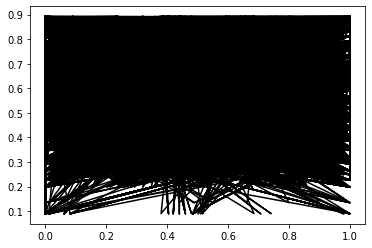

In [180]:
import matplotlib.pyplot as plt 
import seaborn as sns 


y_pred = model.predict(x_test) 
#plt.scatter(x_test, y_test, color ='b') 
plt.plot(x_test, y_pred, color ='k') 
  
plt.show()


In [181]:
#fit linear regression model
import statsmodels.api as sm

model = sm.OLS(y_train, x_train).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 PtsEst   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     5536.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:50:52   Log-Likelihood:                 24068.
No. Observations:               15151   AIC:                        -4.809e+04
Df Residuals:                   15129   BIC:                        -4.793e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
EpsPoints     -6.908e+09    7.3e+10     -0.095

C:\Users\kesha\anaconda3\lib\site-packages\statsmodels\sandbox\regression\predstd.py:97: RuntimeWarning: invalid value encountered in sqrt
  predstd = np.sqrt(predvar)


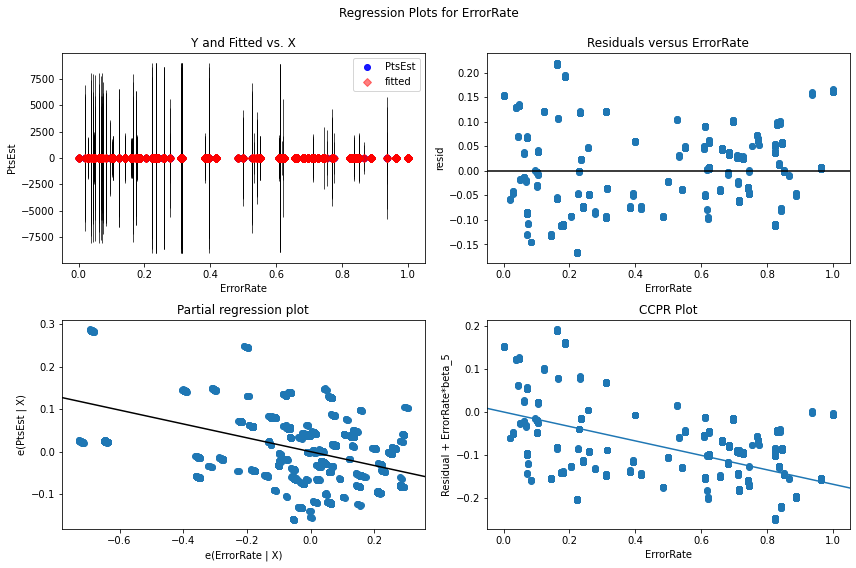

In [182]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce residual plots
fig = sm.graphics.plot_regress_exog(model, 'ErrorRate', fig=fig)


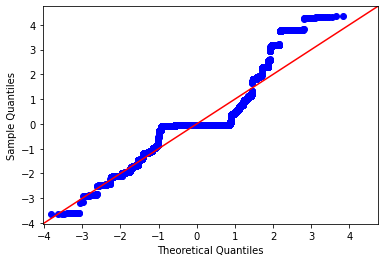

In [183]:
#define residuals
res = model.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show() 


C:\Users\kesha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


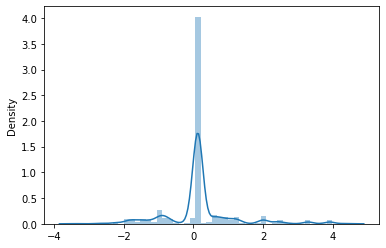

In [184]:
sns.distplot(model.get_influence().resid_studentized_internal)
plt.show()


In [185]:
companyeps

,what_search,fquarter,reported_earnings,estimize_consensus,estimize_mean,wall_street_consensus
0,WTI,FQ3'21,0,-0.06,-0.05,-0.09
1,WTI,FQ2'21,0.02,0.11,0.11,0.09
2,WTI,FQ1'21,0.11,0.08,0.08,0.05
3,WTI,FQ4'20,-0.05,-0.14,-0.05,-0.15
4,ARNA,FQ3'21,-3.21,-2.53,-2.67,-2.55
...,...,...,...,...,...,...
255,FICO,FQ4'20,2.74,2.58,2.54,2.29
256,RVLV,FQ3'21,0.22,0.25,0.22,0.15
257,RVLV,FQ2'21,0.42,0.26,0.25,0.21
258,RVLV,FQ1'21,0.3,-,0.13,Nan


In [186]:
companyeps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   what_search            260 non-null    object
 1   fquarter               260 non-null    object
 2   reported_earnings      258 non-null    object
 3   estimize_consensus     260 non-null    object
 4   estimize_mean          260 non-null    object
 5   wall_street_consensus  260 non-null    object
dtypes: object(6)
memory usage: 12.3+ KB


In [187]:
companyeps = companyeps.dropna()

In [188]:
companyeps = companyeps[companyeps.estimize_consensus != '-']
companyeps = companyeps[companyeps.estimize_mean != '-']
companyeps = companyeps[companyeps.wall_street_consensus != '-']
companyeps = companyeps[companyeps.reported_earnings != '-']


In [189]:
companyeps['estimize_consensus'] = companyeps['estimize_consensus'].astype(float)
#data['Rank'] = float(data['Rank'])
companyeps['estimize_mean'] = companyeps['estimize_mean'].astype(float)
companyeps['wall_street_consensus'] = companyeps['wall_street_consensus'].astype(float)
companyeps['reported_earnings'] = companyeps['reported_earnings'].astype(float)
#data['Revenue'] = data['Revenue'].astype(float)
#data['ErrorRate'] = data['ErrorRate'].astype(float)
#data['Accuracy'] = data['Accuracy'].astype(float)
#data['confidence_score'] = data['confidence_score'].astype(float)
#data['errorrate'] = data['errorrate'].astype(float)
#data['Rank'] = data['Rank'].astype(float)


In [190]:
companyeps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 257
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   what_search            230 non-null    object 
 1   fquarter               230 non-null    object 
 2   reported_earnings      226 non-null    float64
 3   estimize_consensus     226 non-null    float64
 4   estimize_mean          226 non-null    float64
 5   wall_street_consensus  225 non-null    float64
dtypes: float64(4), object(2)
memory usage: 12.6+ KB


In [191]:
companyeps.describe()

,reported_earnings,estimize_consensus,estimize_mean,wall_street_consensus
count,226.000000,226.000000,226.000000,225.00000
mean,0.618850,0.564867,0.592832,0.51280
std,1.053026,0.914559,0.893631,0.89216
min,-3.210000,-2.530000,-2.670000,-2.55000
25%,0.030000,0.030000,0.020000,0.01000
50%,0.355000,0.330000,0.460000,0.28000
75%,1.077500,1.040000,1.125000,1.05000
max,4.580000,3.590000,3.400000,3.36000


In [192]:
companyeps.corr()

,reported_earnings,estimize_consensus,estimize_mean,wall_street_consensus
reported_earnings,1.000000,0.953748,0.908644,0.941700
estimize_consensus,0.953748,1.000000,0.961961,0.995302
estimize_mean,0.908644,0.961961,1.000000,0.960638
wall_street_consensus,0.941700,0.995302,0.960638,1.000000


In [194]:
import altair as alt

corr_df = companyeps.corr()

pivot_cols = list(corr_df.columns)
corr_df['cat'] = corr_df.index

# actual chart
alt.Chart(corr_df).mark_rect(tooltip=True)\
   .transform_fold(pivot_cols)\
   .encode(
       x="cat:N", 
       y='key:N', 
       color=alt.Color("value:Q", scale=alt.Scale(scheme="redyellowblue"))
   )


alt.Chart(...)

In [195]:
base = alt.Chart(corr_df).transform_fold(pivot_cols).encode(x="cat:N",  y='key:N').properties(height=300, width=300)
boxes = base.mark_rect().encode(color=alt.Color("value:Q", scale=alt.Scale(scheme="redyellowblue")))
labels = base.mark_text(size=20, color="white").encode(text=alt.Text("value:Q", format="0.1f"))
boxes + labels


alt.LayerChart(...)

In [196]:
#companyeps.melt(id_vars='what_search').groupby(['estimize_consensus']).mean()
#companyeps.pivot_table(companyeps, values='what_search', index='estimize_consensus', aggfunc='mean')


In [197]:
companyeps.what_search.nunique()

65